In [1]:
from Final_Project.muon_propagation import *
from Final_Project.atm_muon import *
from Final_Project.geometry import *
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N_Injected = int(1e7)

# Muon rest mass (MeV)
m0 = 105.6583755

# Muon Momentum in GeV
E_mu = 10**(np.random.uniform(0,5,N_Injected))
kinetic_energy = E_mu - m0*10**(-3)
gammas = gamma_from_KE(KE=kinetic_energy, m=m0*10**(-3))
betas= beta_from_gamma(gamma=gammas)
momentum = betas*gammas*m0**10**(-3)
#momentums = 10**(np.random.uniform(0,5,N_Injected))
# Zenith Distribution of Muon
cos_zenith = np.random.uniform(0,1,N_Injected)
# 
azimuth = np.random.uniform(-np.pi, np.pi, N_Injected)
# Area Injected
size=100
x = np.random.uniform(-size,size,N_Injected)
y = np.random.uniform(-size,size,N_Injected)

In [3]:
# Test Computation of the Interaction Length
result = compute_interaction_length(50,15,x,y,100, np.arccos(cos_zenith), azimuth)
point_ent = compute_entry_point(50,15,x[result>0],y[result>0],100, np.arccos(cos_zenith[result>0]), azimuth[result>0])
point_ext = compute_exit_point(50,15,x[result>0],y[result>0],100, np.arccos(cos_zenith[result>0]), azimuth[result>0])

/home/maxwe/homework_code/Final_Project/geometry.py:12: RuntimeWarning: invalid value encountered in sqrt
  t1 = (-b + np.sqrt(discriminant)) / (2 * a)
/home/maxwe/homework_code/Final_Project/geometry.py:13: RuntimeWarning: invalid value encountered in sqrt
  t2 = (-b - np.sqrt(discriminant)) / (2 * a)


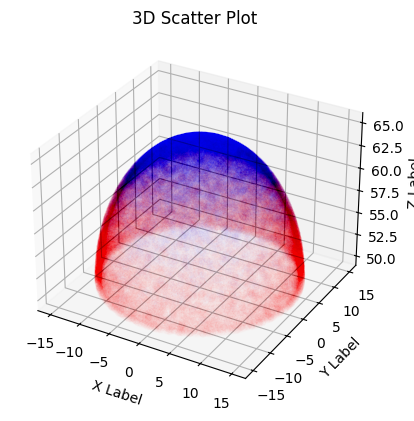

In [4]:
# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

cut = point_ext[2] > 50
ax.scatter(point_ent[0][cut], point_ent[1][cut], point_ent[2][cut], c='blue', marker='o', alpha=.004)
ax.scatter(point_ext[0][cut], point_ext[1][cut], point_ext[2][cut], c='red', marker='o', alpha=.004)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.title('3D Scatter Plot')
plt.show()

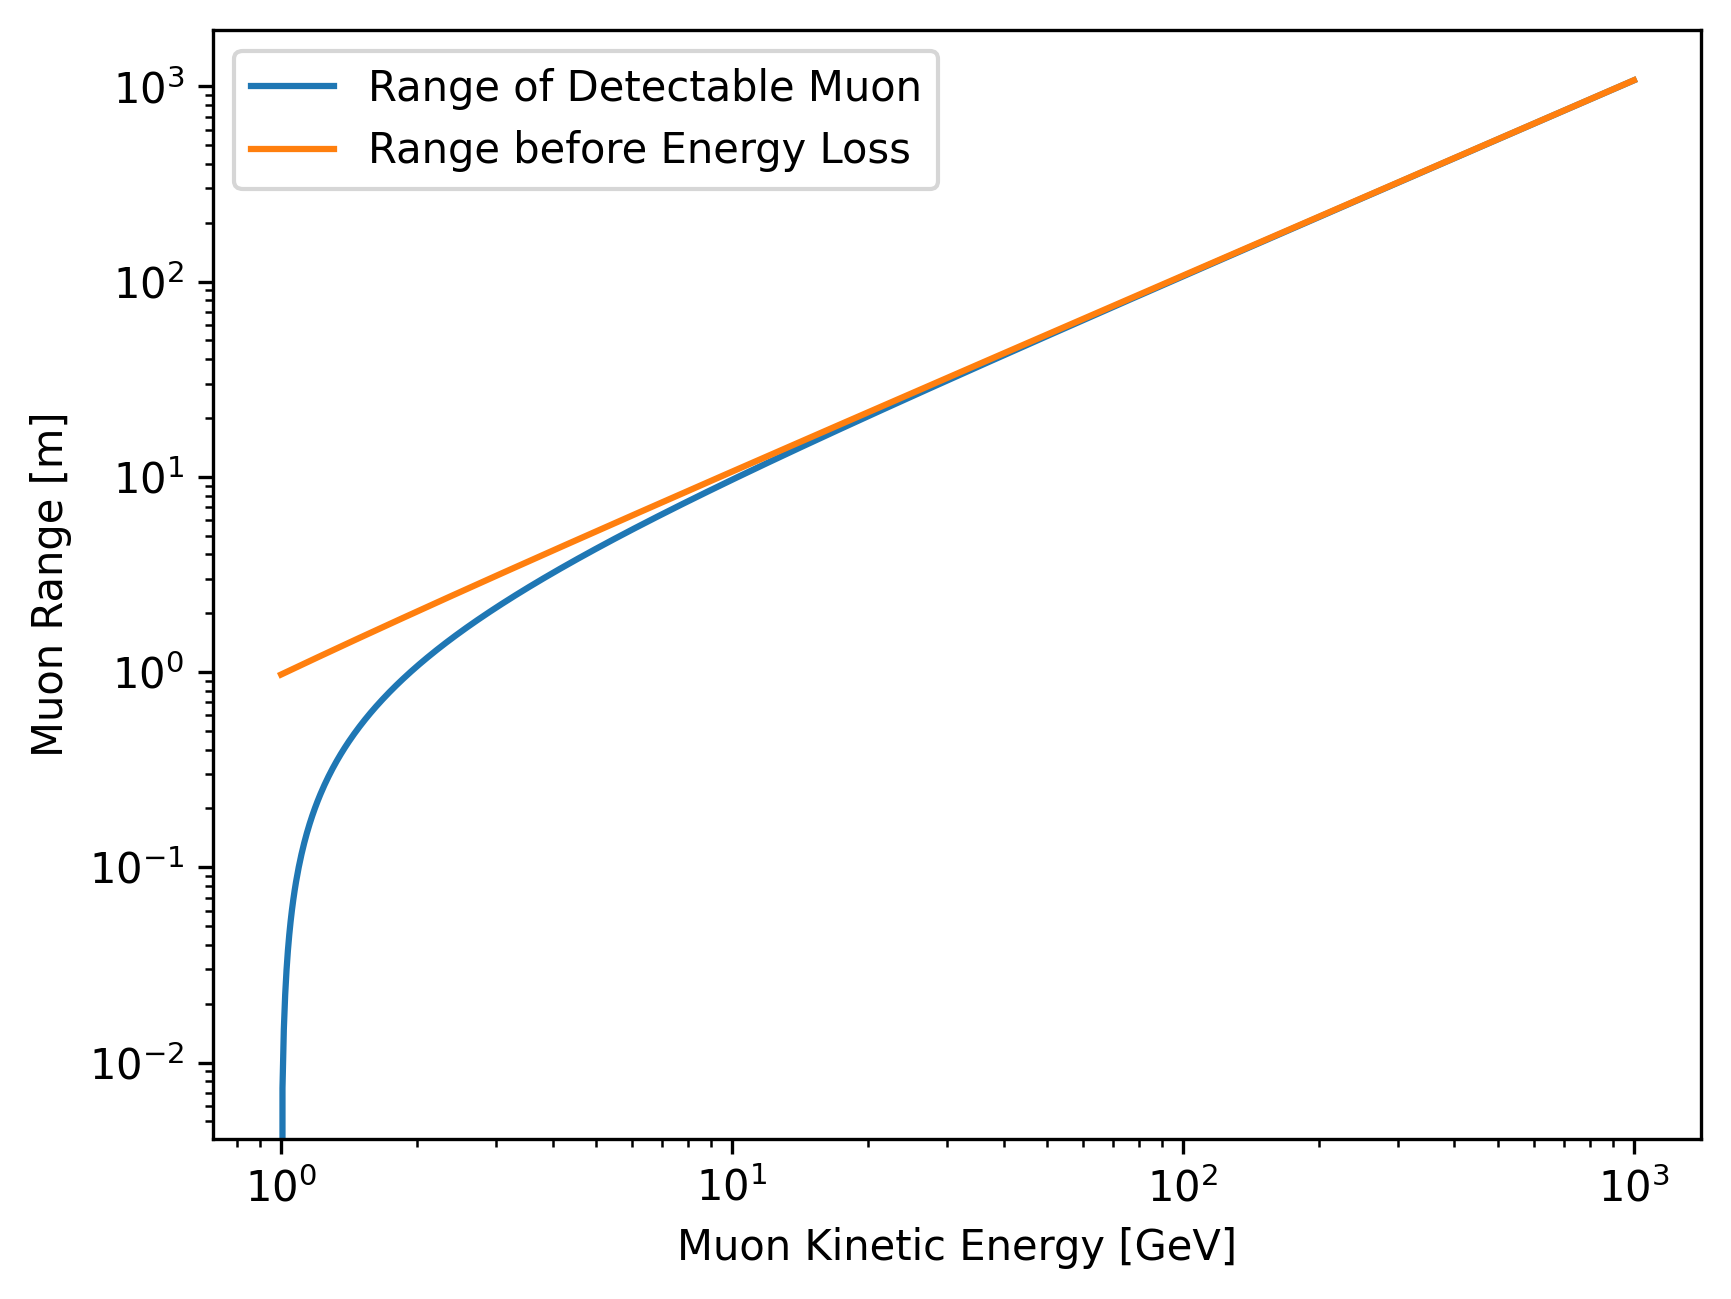

In [5]:
p = 2.329 #g/cm^3

# Final Detector Energy [Minimum Kinetic Energy]
E_f = 1 # GeV

energies = np.geomspace(1,1e3,1000)
detector_range = muon_range_detector(Z = 1, p=p,E=energies*10**3, E_f = 10**3, m=m0)
zero_range =  muon_range(Z = 1, p=p,E=energies*10**3, m=m0)
plt.figure(dpi=300)
plt.plot(energies, detector_range/100, label='Range of Detectable Muon')
plt.plot(energies, zero_range/100, label='Range before Energy Loss')
plt.ylabel('Muon Range [m]')
plt.xlabel('Muon Kinetic Energy [GeV]')
plt.xscale('log')
plt.yscale('log')
plt.legend(loc='best')
plt.show()

9.498917420794294


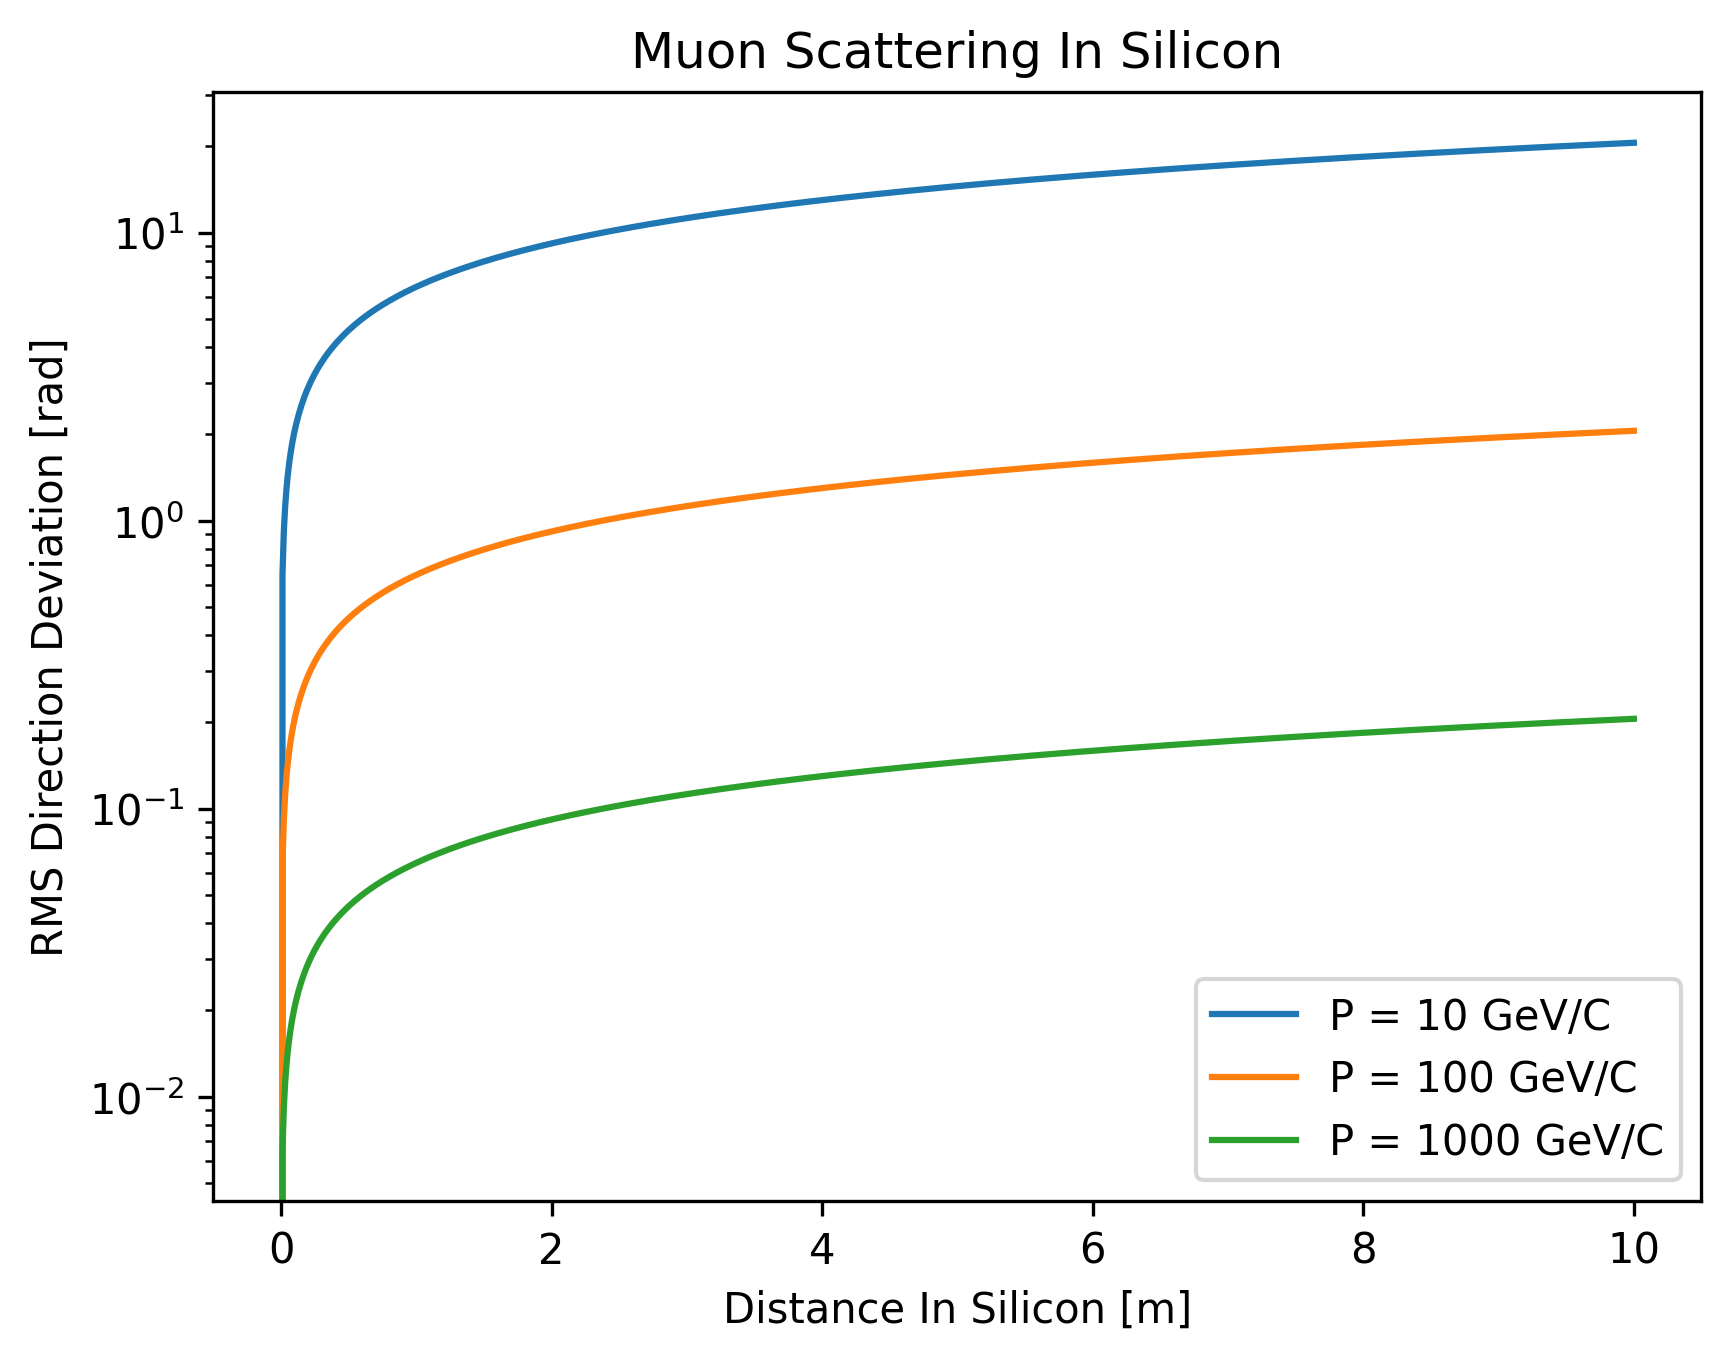

In [6]:
# Test Radiation Length and Scattering Angle Computation

# Density of Silicon 
p = 2.329 #g/cm^3
# Standard Atomic Weight
Ar = 28.085 
dist = np.linspace(0,10,1000)
x_0 = 1/one_over_radiation_length(p, Znucl=14, Ar=Ar)
print(x_0)
rms1 = scattering_angle(L=dist, Z=1, Znucl=14, P=10, B=1, p=p, Ar=Ar)
rms2 = scattering_angle(L=dist, Z=1, Znucl=14, P=100, B=1, p=p, Ar=Ar)
rms3 = scattering_angle(L=dist, Z=1, Znucl=14, P=1000, B=1, p=p, Ar=Ar)
plt.figure(dpi =300)
plt.plot(dist, rms1, label = 'P = 10 GeV/C')
plt.plot(dist, rms2, label = 'P = 100 GeV/C')
plt.plot(dist, rms3, label = 'P = 1000 GeV/C')
plt.yscale('log')
plt.legend(loc = 'best')
plt.title('Muon Scattering In Silicon')
plt.ylabel('RMS Direction Deviation [rad]')
plt.xlabel('Distance In Silicon [m]')
#plt.xscale('log')
plt.show()


In [7]:
scat_angle = compute_deflection_angle(rms=.1)

theta_new, phi_new = scatter_muon(zenith=np.arccos(cos_zenith), azimuth=azimuth, scat_angle=scat_angle)

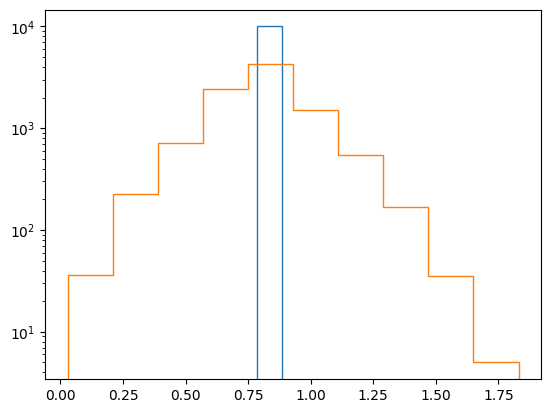

In [21]:
# Generate random data
N = int(1e4)
theta = np.zeros(N)+np.pi/4
azimuth =  np.zeros(N)
x,y,z = spherical_to_cartesian(azimuth, theta)
scat_angle = compute_deflection_angle(rms=(np.zeros(N))+.3)

theta_new, phi_new = scatter_muon(theta, azimuth, scat_angle)
x2,y2,z2= spherical_to_cartesian(phi_new, theta_new)

plt.figure()
plt.hist(theta, histtype='step')
plt.hist(theta_new, histtype='step')
plt.yscale('log')
plt.show()

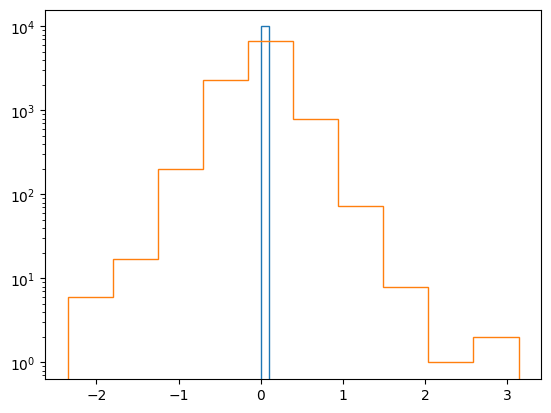

In [23]:
plt.figure()
plt.hist(azimuth, histtype='step')
plt.hist(phi_new, histtype='step')
plt.yscale('log')
plt.show()

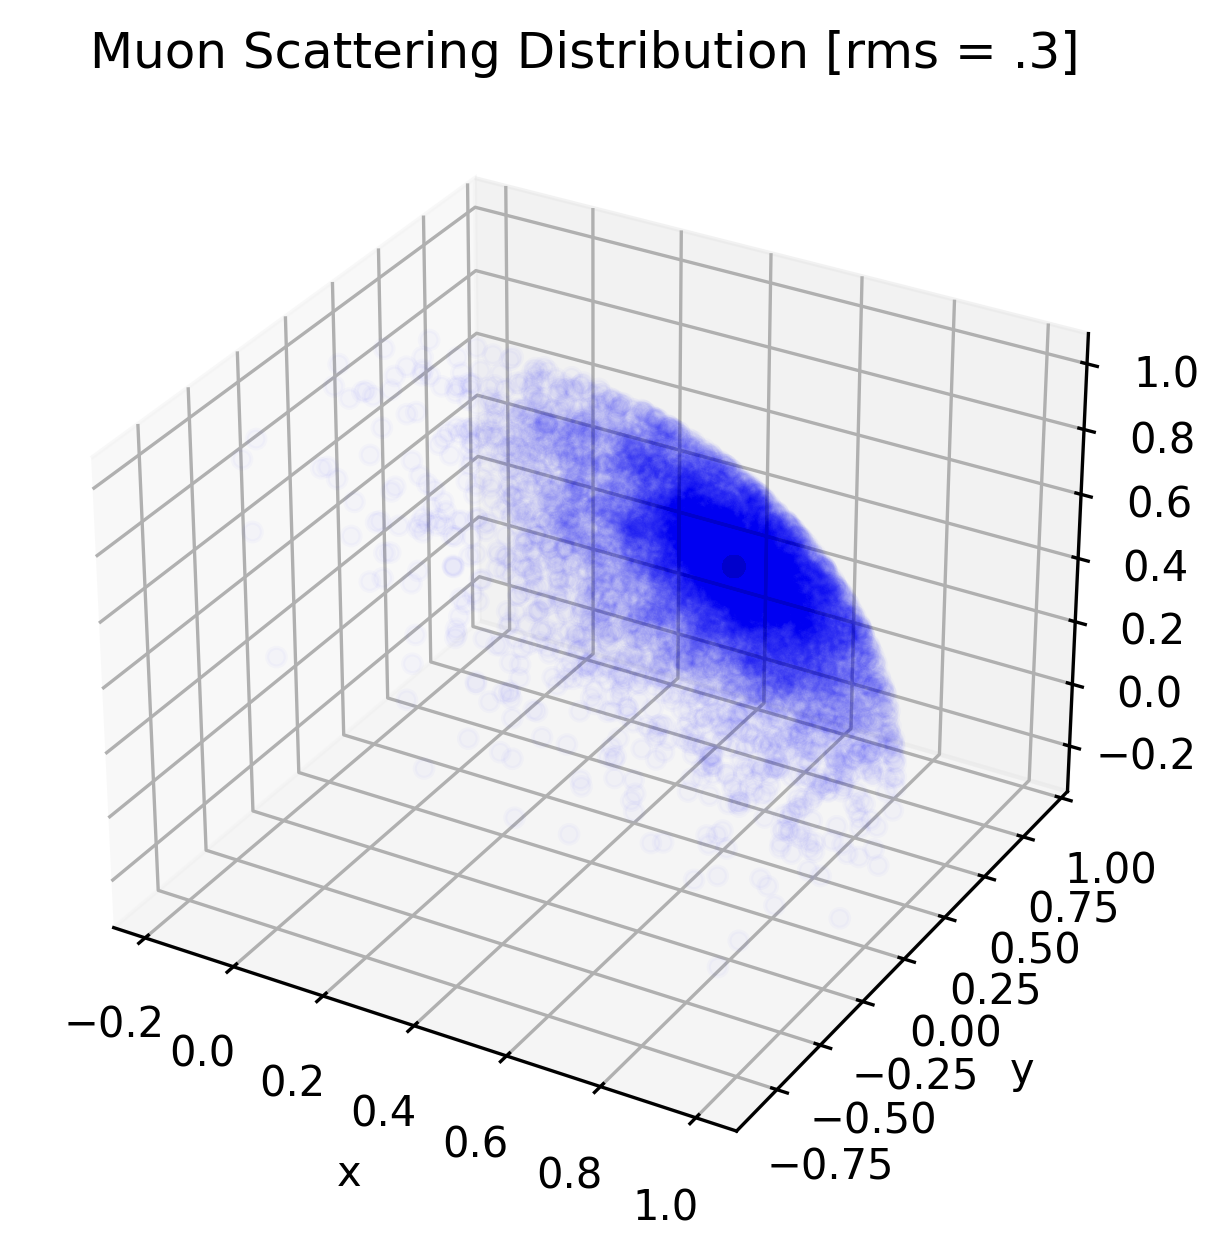

In [26]:
# Create a 3D scatter plot
fig = plt.figure(dpi = 300)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x2, y2, z2, c='blue', marker='o', alpha=.02)
ax.scatter(x, y, z, c='r', marker='o', alpha=1)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.title(f'Muon Scattering Distribution [rms = .3]')
plt.show()